<a href="https://colab.research.google.com/github/souvik25162/ArimaAnnHybrid/blob/master/Bayesian_Sarima%2Blstm_Sweden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step1:

#Update pymc3

In [ ]:
!pip install pymc3==3.8

In [ ]:
!pip install arviz==0.6.1

#Required Packages for Arima &Sarima

In [20]:
%matplotlib inline
import theano
import theano.tensor as tt
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
from pandas_datareader.data import DataReader
from pandas.plotting import register_matplotlib_converters
plt.style.use('seaborn')
register_matplotlib_converters()

#Sweden Unempoyment dataset

In [21]:
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('sweden.csv')
df.rename(columns={'LRHUTTTTSEM156S':'values'},inplace=True)
df.head()
print(df.shape)

Saving sweden.csv to sweden (5).csv
(432, 2)


In [22]:
df.head()

,DATE,values
0,1983-01-01,3.4
1,1983-02-01,3.7
2,1983-03-01,3.7
3,1983-04-01,3.4
4,1983-05-01,3.7


In [23]:
df.index= pd.to_datetime(df.pop('DATE'))

In [24]:
training_datalen=396

In [25]:
ts=df['values']
train=ts[0:396]
test= ts[396:len(ts)]

In [26]:
df.head()

,values
DATE,
1983-01-01,3.4
1983-02-01,3.7
1983-03-01,3.7
1983-04-01,3.4
1983-05-01,3.7


In [27]:
inf=df

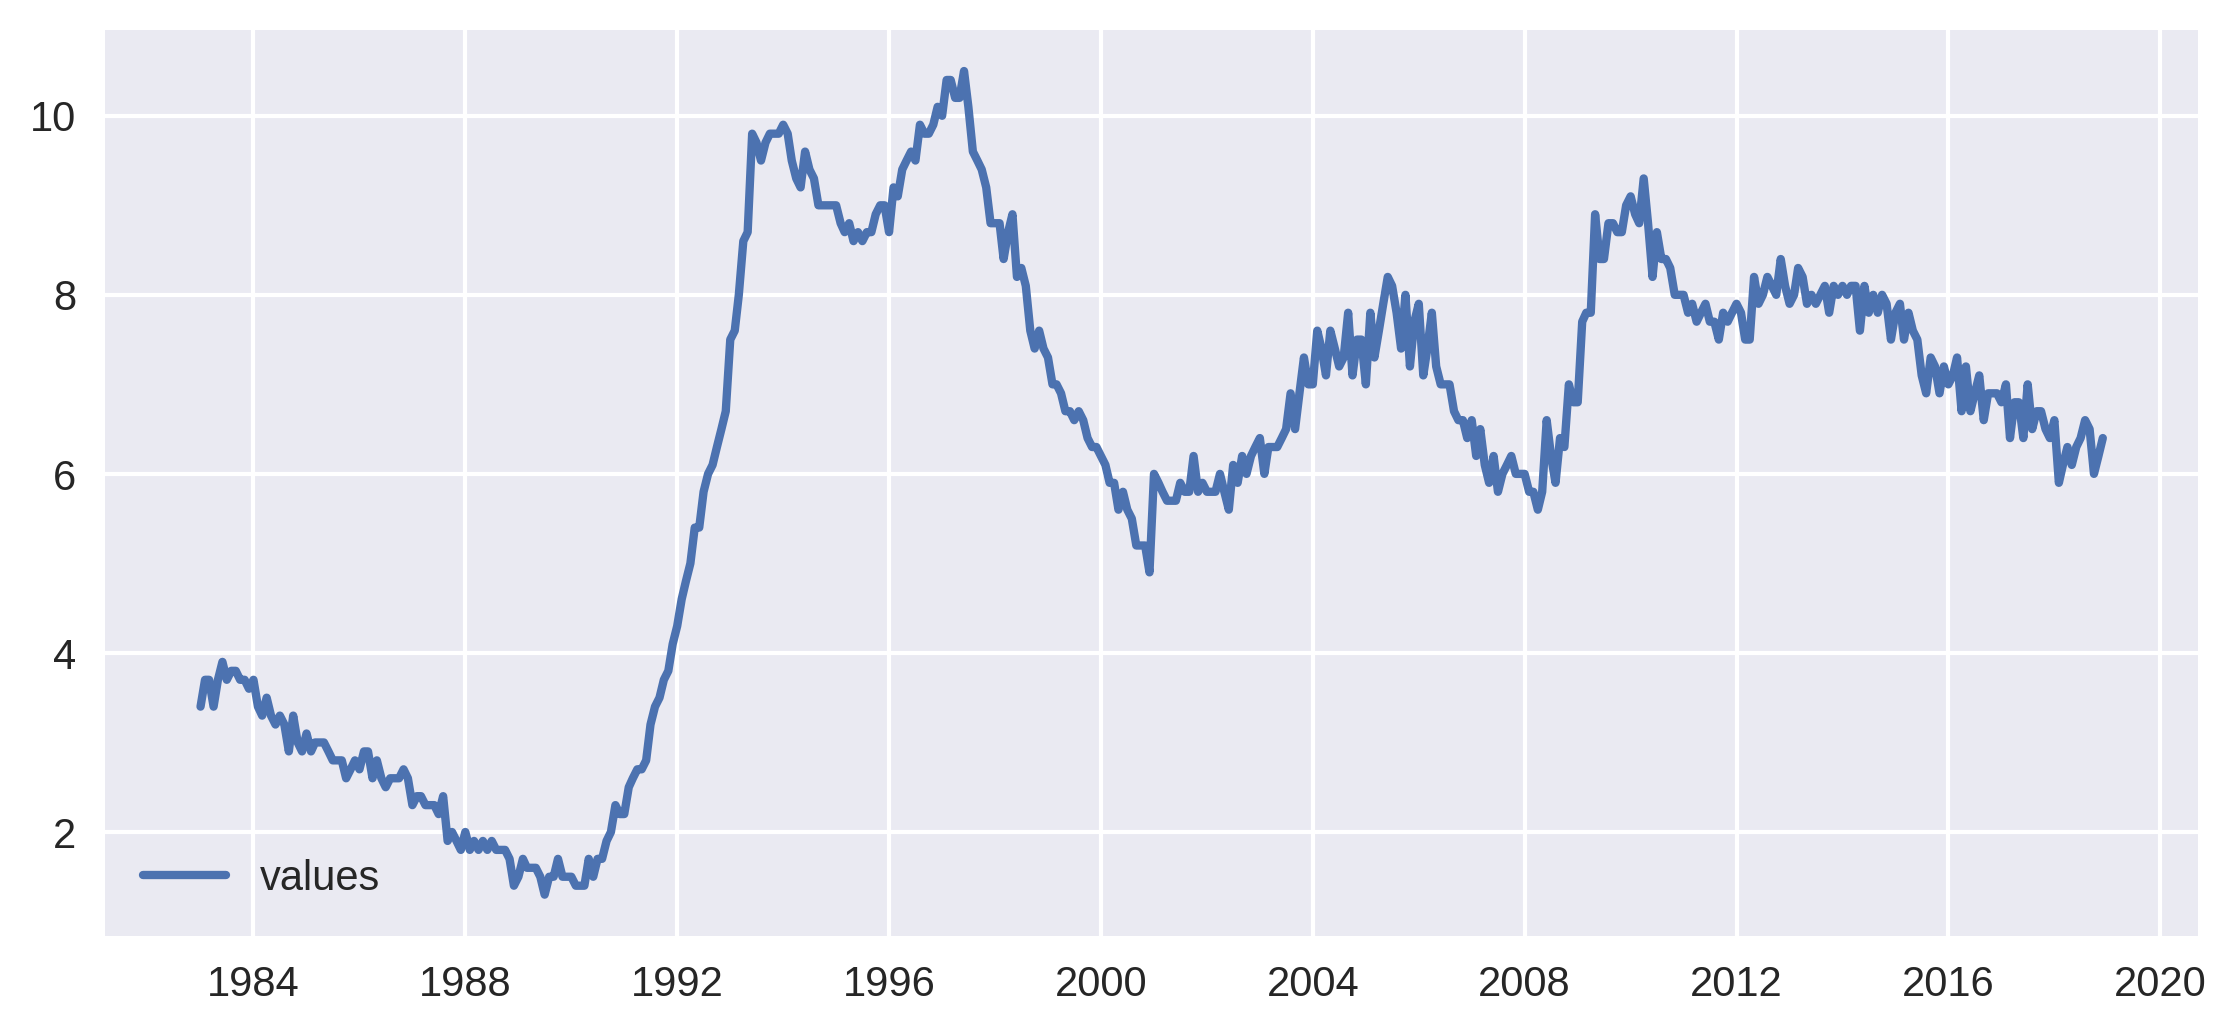

In [28]:
fig, ax = plt.subplots(figsize=(9, 4), dpi=300)
ax.plot(inf.index, inf, label=r'values', lw=2)
ax.legend(loc='lower left')
plt.show()

#ARIMA MODEL

In [29]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [30]:
history=[x for x in train]
predictions=list()

for t in range(len(test)):
  model=sm.tsa.statespace.SARIMAX(history,order=(4,1,1))
  model_fit=model.fit(disp=False)
  output=model_fit.forecast()
  yhat=output[0]
  predictions.append(yhat)
  obs=test[t]
  history.append(obs)
  print('predicted=%f, expected=%f'%(yhat,obs))
  predict_mle = model_fit.get_prediction()
  predict_mle_ci = predict_mle.conf_int()


predicted=7.090290, expected=7.000000
predicted=6.933290, expected=7.100000
predicted=7.097580, expected=7.300000
predicted=7.166619, expected=6.700000
predicted=6.908388, expected=7.200000
predicted=7.125871, expected=6.700000
predicted=6.701352, expected=6.900000
predicted=6.917242, expected=7.100000
predicted=6.882541, expected=6.600000
predicted=6.762830, expected=6.900000
predicted=6.877907, expected=6.900000
predicted=6.745104, expected=6.900000
predicted=6.911589, expected=6.800000
predicted=6.849274, expected=7.000000
predicted=6.934937, expected=6.400000
predicted=6.595869, expected=6.800000
predicted=6.733366, expected=6.800000
predicted=6.599790, expected=6.400000
predicted=6.580118, expected=7.000000
predicted=6.801638, expected=6.500000
predicted=6.531125, expected=6.700000
predicted=6.775662, expected=6.700000
predicted=6.594679, expected=6.500000
predicted=6.591427, expected=6.400000
predicted=6.462985, expected=6.600000
predicted=6.460572, expected=5.900000
predicted=6.

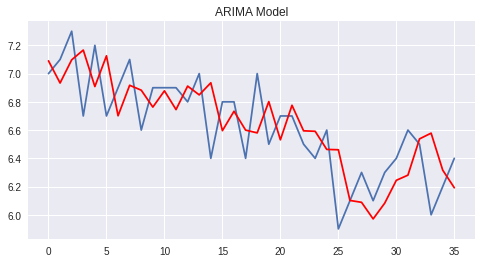

In [31]:
plt.figure(figsize=(8,4))
plt.title("ARIMA Model")
plt.plot(test.values)
plt.plot(predictions, color='red')
plt.show()

#RMSE for Arima

In [32]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test,predictions)
print("MSE:",error)

print("RMSE:",np.sqrt(error))

MSE: 0.0686723396632398
RMSE: 0.2620540777458725


#Basic Sarima Model with p=1 & q=1

In [33]:
mod = sm.tsa.statespace.SARIMAX(inf, order=(1, 0, 1))

res_mle = mod.fit(disp=False)
print(res_mle.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                           Statespace Model Results                           
Dep. Variable:                 values   No. Observations:                  432
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -48.319
Date:                Tue, 12 Jan 2021   AIC                            102.639
Time:                        16:07:08   BIC                            114.844
Sample:                    01-01-1983   HQIC                           107.457
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9993      0.001    824.574      0.000       0.997       1.002
ma.L1         -0.2504      0.042     -5.935      0.000      -0.333      -0.168
sigma2         0.0722      0.004     19.934      0.0

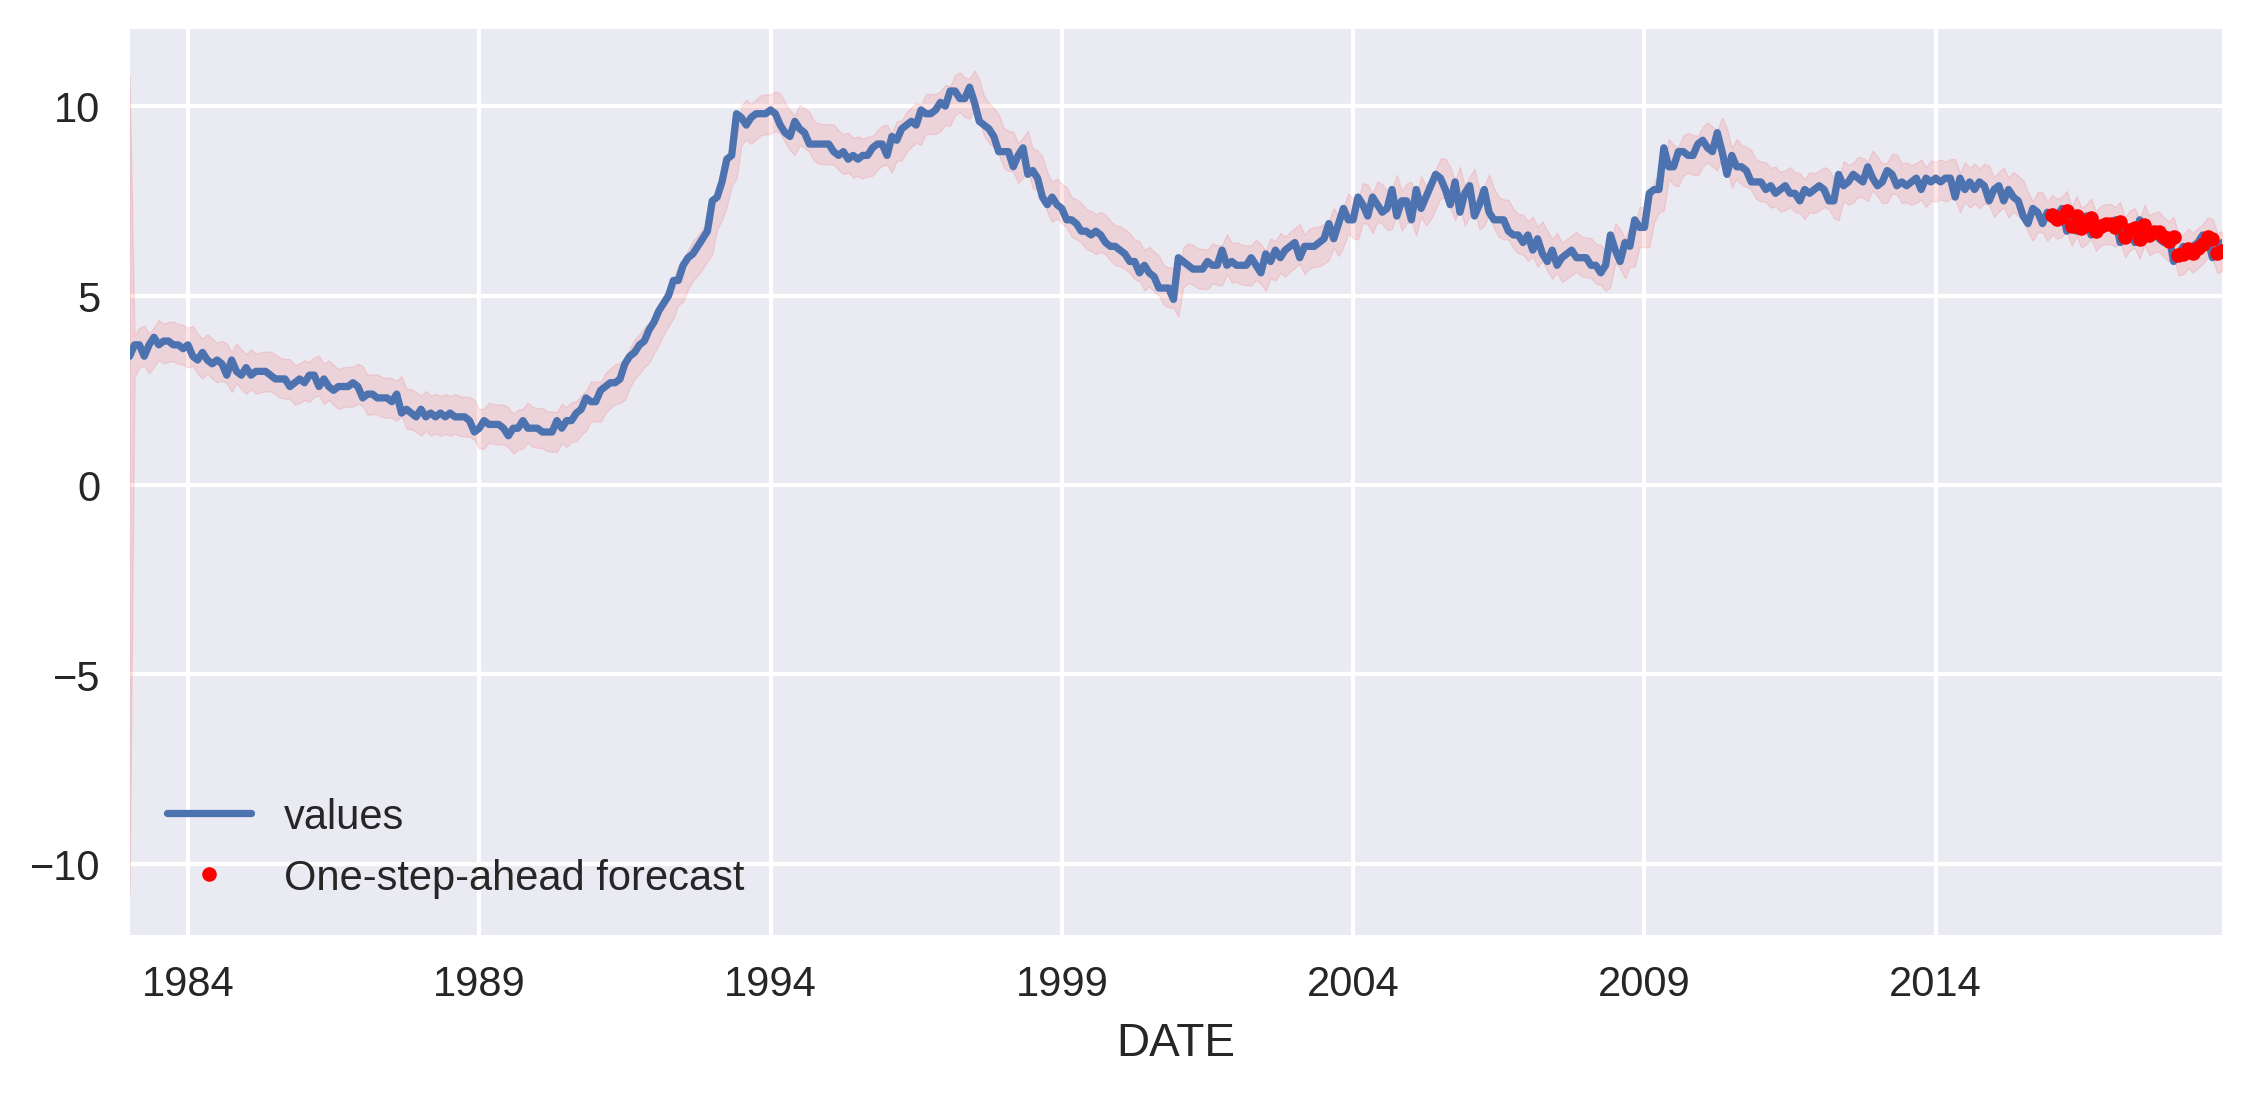

In [35]:
predict_mle = res_mle.get_prediction()
predict_mle_ci = predict_mle.conf_int()
lower = predict_mle_ci['lower values']
upper = predict_mle_ci['upper values']

# Graph
fig, ax = plt.subplots(figsize=(9,4), dpi=300)
# Plot data points
inf.plot(ax=ax, style='-', label='Observed')

# Plot predictions
predict_mle.predicted_mean[training_datalen:len(ts)].plot(ax=ax, style='r.', label='One-step-ahead forecast')
ax.fill_between(predict_mle_ci.index, lower, upper, color='r', alpha=0.1)
ax.legend(loc='lower left')
plt.show()


In [36]:
output= predict_mle.predicted_mean

In [41]:
pred= output[training_datalen:len(output)]

In [42]:
pred

2016-01-01    7.137613
2016-02-01    7.029770
2016-03-01    7.077662
2016-04-01    7.239442
2016-05-01    6.830585
2016-06-01    7.102682
2016-07-01    6.796342
2016-08-01    6.869426
2016-09-01    7.037513
2016-10-01    6.705130
2016-11-01    6.846587
2016-12-01    6.882007
2017-01-01    6.890875
2017-02-01    6.818202
2017-03-01    6.949793
2017-04-01    6.533378
2017-05-01    6.728688
2017-06-01    6.777592
2017-07-01    6.490260
2017-08-01    6.867680
2017-09-01    6.587712
2017-10-01    6.667399
2017-11-01    6.687351
2017-12-01    6.542559
2018-01-01    6.431411
2018-02-01    6.553368
2018-03-01    6.059646
2018-04-01    6.085812
2018-05-01    6.242152
2018-06-01    6.131509
2018-07-01    6.253594
2018-08-01    6.359057
2018-09-01    6.535252
2018-10-01    6.504475
2018-11-01    6.122298
2018-12-01    6.176394
Freq: MS, dtype: float64

In [44]:
test= ts[training_datalen:len(ts)]

In [45]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test,pred)
print("MSE:",error)

print("RMSE:",np.sqrt(error))

MSE: 0.08134794597454115
RMSE: 0.28521561313248817


#BAYESIAN Sarima


In [46]:
inf = df
#inf is the series we will use for analysis
print(inf.head())

            values
DATE              
1983-01-01     3.4
1983-02-01     3.7
1983-03-01     3.7
1983-04-01     3.4
1983-05-01     3.7


In [47]:
mod = sm.tsa.statespace.SARIMAX(inf, order=(1, 0, 1))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [48]:
class Loglike(tt.Op):

    itypes = [tt.dvector] # expects a vector of parameter values when called
    otypes = [tt.dscalar] # outputs a single scalar value (the log likelihood)

    def __init__(self, model):
        self.model = model
        self.score = Score(self.model)

    def perform(self, node, inputs, outputs):
        theta, = inputs  # contains the vector of parameters
        llf = self.model.loglike(theta)
        outputs[0][0] = np.array(llf) # output the log-likelihood

    def grad(self, inputs, g):
        # the method that calculates the gradients - it actually returns the
        # vector-Jacobian product - g[0] is a vector of parameter values
        theta, = inputs  # our parameters
        out = [g[0] * self.score(theta)]
        return out


class Score(tt.Op):
    itypes = [tt.dvector]
    otypes = [tt.dvector]

    def __init__(self, model):
        self.model = model

    def perform(self, node, inputs, outputs):
        theta, = inputs
        outputs[0][0] = self.model.score(theta)

In [49]:
# Set sampling params
ndraws = 3000  # number of draws from the distribution
nburn = 800  # number of "burn-in points" (which will be discarded)

In [50]:
loglike = Loglike(mod)

In [51]:
with pm.Model():
    # Priors
    arL1 = pm.Uniform('ar.L1', -0.99, 0.99)
    maL1 = pm.Uniform('ma.L1', -0.99, 0.99)
    sigma2 = pm.InverseGamma('sigma2', 2, 4)

    # convert variables to tensor vectors
    theta = tt.as_tensor_variable([arL1, maL1, sigma2])

    # use a DensityDist (use a lamdba function to "call" the Op)
    pm.DensityDist('likelihood', lambda v: loglike(v), observed={'v': theta})

    # Draw samples
    trace = pm.sample(ndraws, tune=nburn, discard_tuned_samples=True, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma2, ma.L1, ar.L1]
Sampling 4 chains, 23 divergences: 100%|██████████| 15200/15200 [06:56<00:00, 36.46draws/s]
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

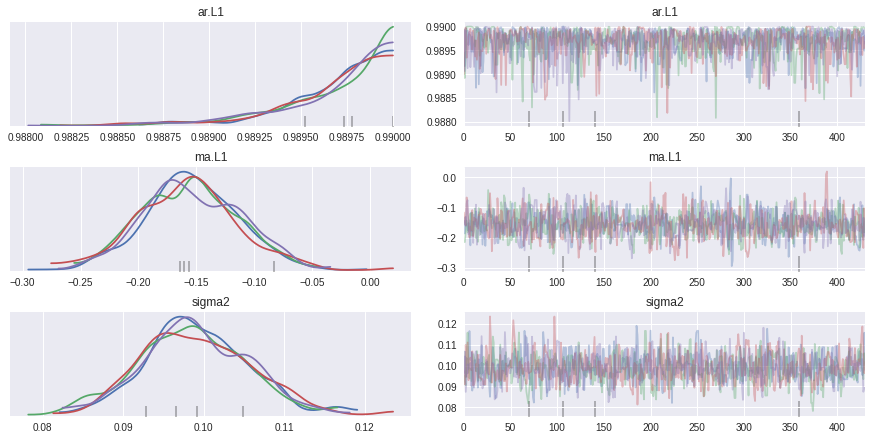

In [59]:
import arviz as az
axes = az.plot_trace(trace[0:len(ts)-1])
fig = axes.ravel()[0].figure

The NUTS sampler is auto-assigned because we provided gradients. PyMC3 will use Metropolis or Slicing samplers if it does not find that gradients are available. There are an impressive number of draws per second for a “block box” style computation! However, note that if the model can be represented directly by PyMC3 (like the AR(p) models mentioned above), then computation can be substantially faster.

Inference is complete, but are the results any good? There are a number of ways to check. The first is to look at the posterior distributions (with lines showing the MLE values):

/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f10121208>,
      dtype=object)

<Figure size 576x396 with 0 Axes>

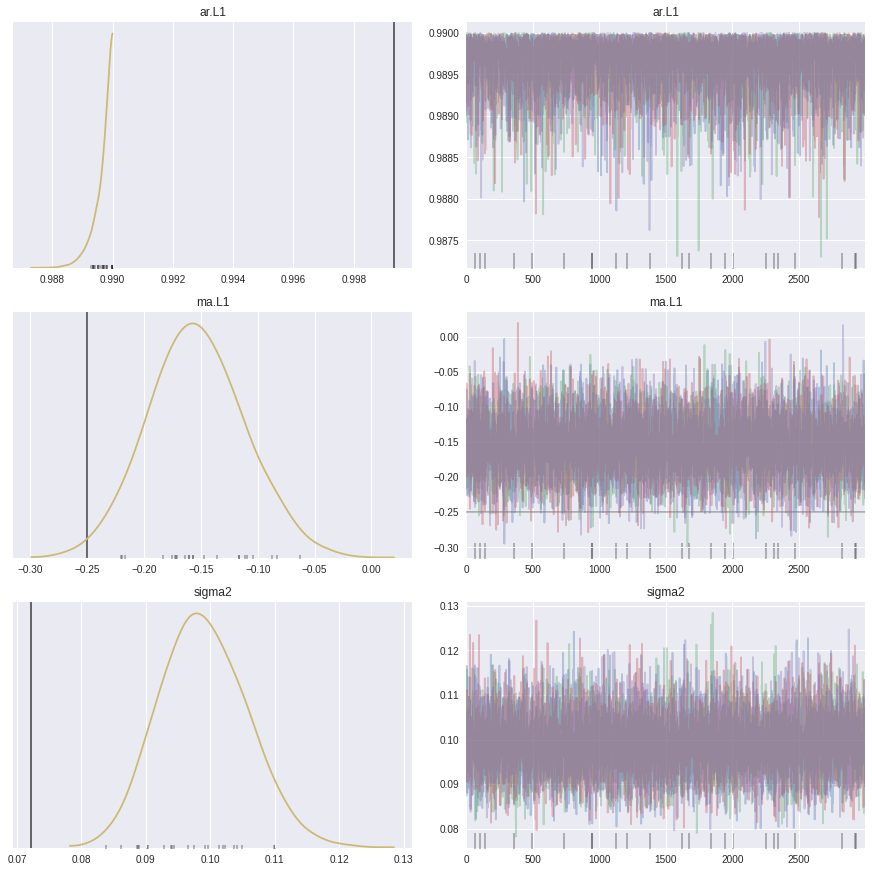

In [60]:
plt.tight_layout()
pm.traceplot(trace,
                 lines=[(k, {}, [v]) for k, v in dict(res_mle.params).items()],
                 combined=True,
                 figsize=(12, 12))

In [61]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
ar.L1,0.990,0.000,0.989,0.990,0.0,0.0,9504.0,9504.0,7065.0,4720.0,1.0
ma.L1,-0.154,0.042,-0.233,-0.074,0.0,0.0,8450.0,8450.0,8485.0,7286.0,1.0
sigma2,0.099,0.007,0.087,0.112,0.0,0.0,8431.0,8405.0,8430.0,7385.0,1.0


R^  is the Gelman-Rubin statistic. It tests for lack of convergence by comparing the variance between multiple chains to the variance within each chain. If convergence has been achieved, the between-chain and within-chain variances should be identical. for all model parameters, we can have some confidence that convergence has been reached if R-hat<1.2



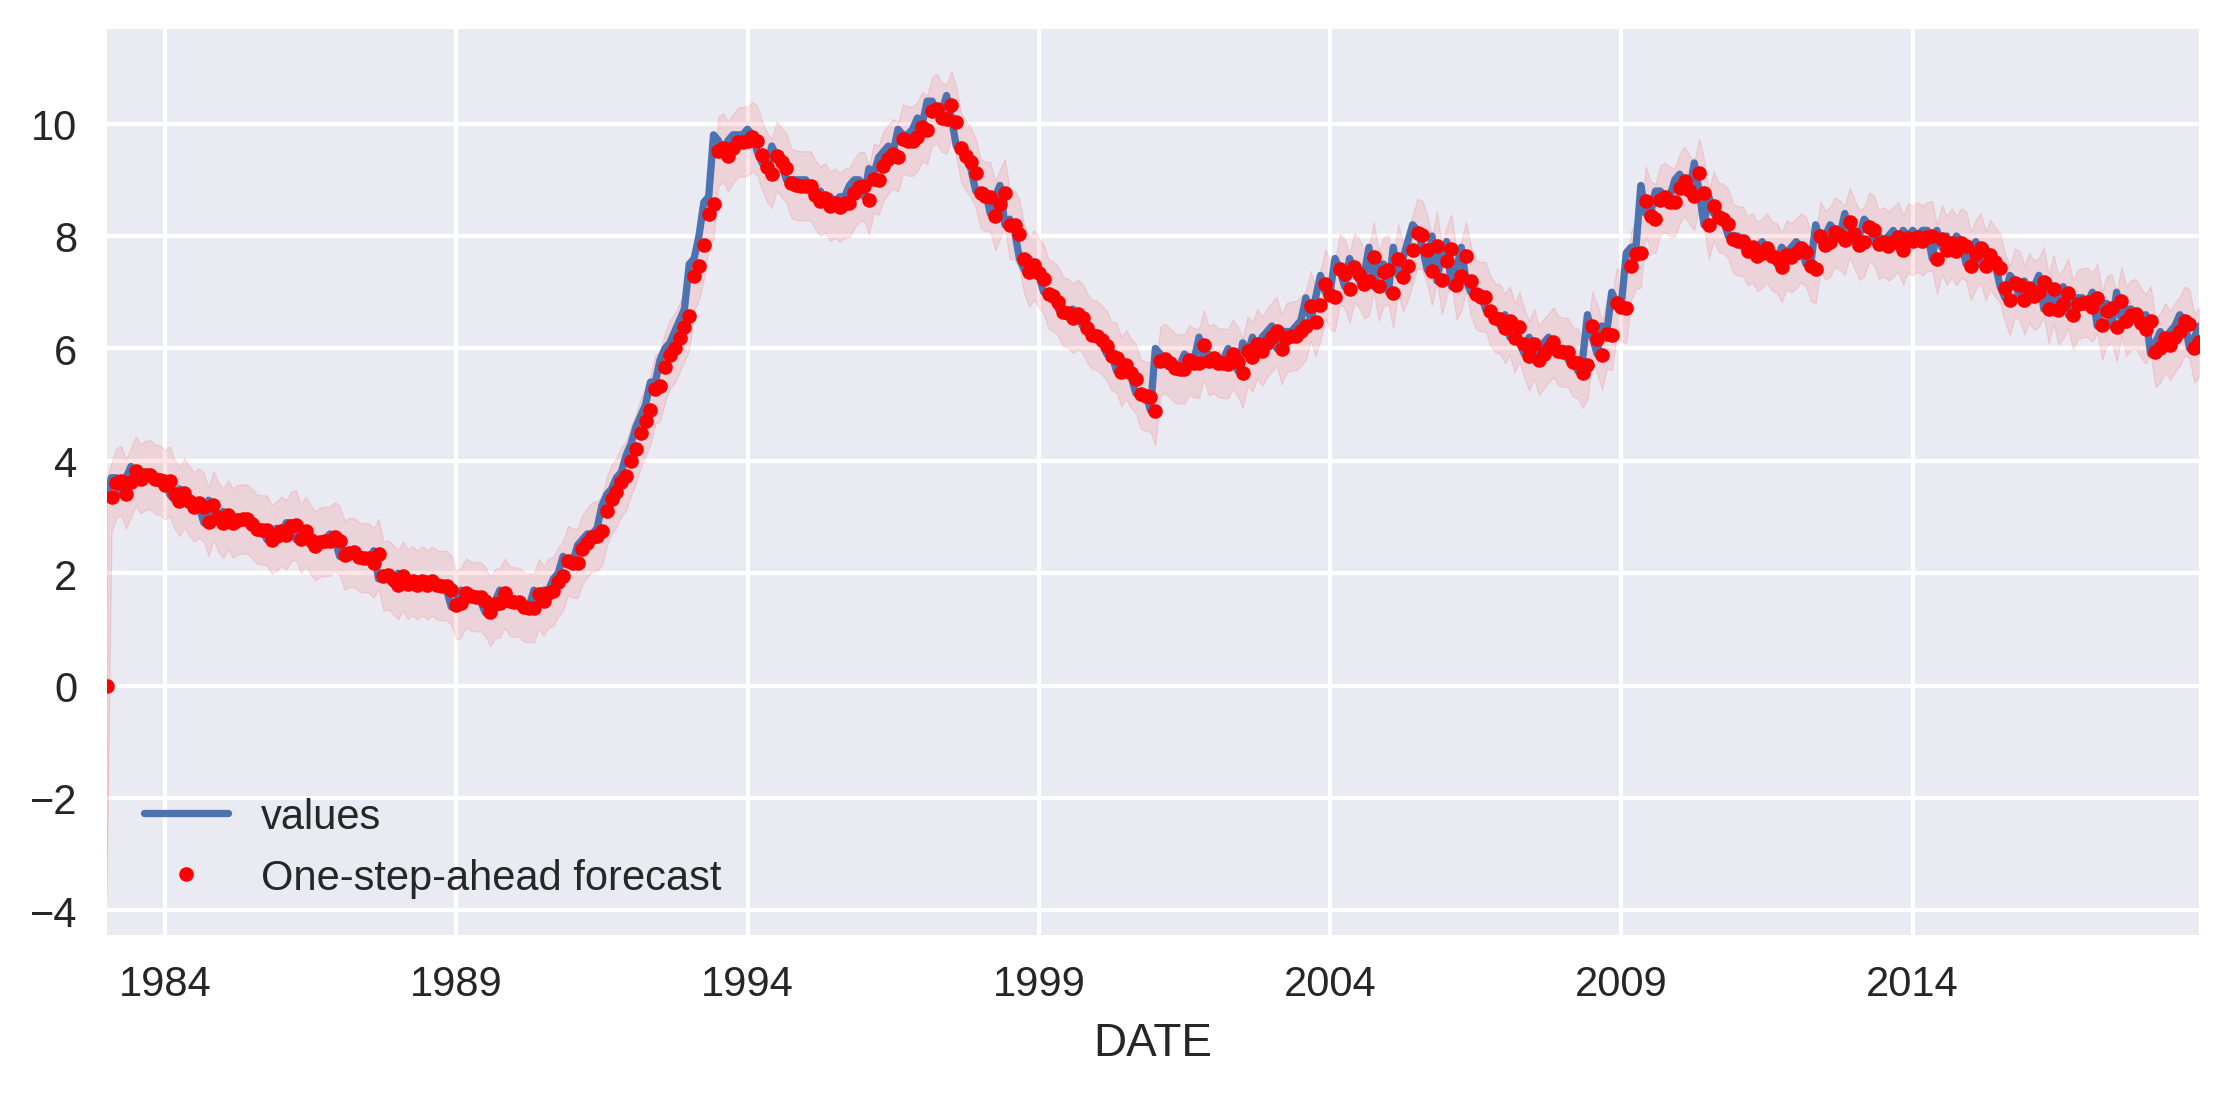

In [55]:
params = pm.summary(trace)['mean'].values

# Construct results using these posterior means as parameter values
res_bayes = mod.smooth(params)

predict_bayes = res_bayes.get_prediction()
predict_bayes_ci = predict_bayes.conf_int()
lower = predict_bayes_ci['lower values']
upper = predict_bayes_ci['upper values']

# Graph
fig, ax = plt.subplots(figsize=(9,4), dpi=300)

# Plot data points
inf.plot(ax=ax, style='-', label='Observed')

# Plot predictions
predict_bayes.predicted_mean.plot(ax=ax, style='r.', label='One-step-ahead forecast')
ax.fill_between(predict_bayes_ci.index, lower, upper, color='r', alpha=0.1)
ax.legend(loc='lower left')
plt.show()

In [56]:
predict_bayes_output = predict_bayes.predicted_mean

In [62]:
pred_bayes=predict_bayes_output[training_datalen:len(predict_bayes_output)]

#Rmse for bayesian model

In [63]:
from sklearn.metrics import mean_squared_error
error2=mean_squared_error(test,pred_bayes)
print("MSE:",error2)

print("RMSE:",np.sqrt(error2))

MSE: 0.09139133274610517
RMSE: 0.302309994452888


#Lstm

In [64]:
import keras
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler,StandardScaler
plt.style.use('fivethirtyeight')
import tensorflow as tf

In [65]:
data=df.filter(['values'])
dataset=data.values
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [66]:
train_data= scaled_data[0:396,:]
time_step=30
test_data= scaled_data[396-time_step:,:]

In [67]:
training_datalen=396

x_train=[]
y_train=[]
for i in range(time_step,len(train_data)):
  x_train.append(train_data[i-time_step:i,0])
  y_train.append(train_data[i,0])
  if i<=time_step:
    print(x_train)
    print(y_train)
    print()

[array([0.22826087, 0.26086957, 0.26086957, 0.22826087, 0.26086957,
       0.2826087 , 0.26086957, 0.27173913, 0.27173913, 0.26086957,
       0.26086957, 0.25      , 0.26086957, 0.22826087, 0.2173913 ,
       0.23913043, 0.2173913 , 0.20652174, 0.2173913 , 0.20652174,
       0.17391304, 0.2173913 , 0.18478261, 0.17391304, 0.19565217,
       0.17391304, 0.18478261, 0.18478261, 0.18478261, 0.17391304])]
[0.16304347826086957]



In [68]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [69]:
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [70]:
print(x_train.shape)

(366, 30, 1)


In [71]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [72]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [73]:
model.fit(x_train,y_train,batch_size=10,epochs=50)

Epoch 1/50
37/37 [==============================] - 4s 22ms/step - loss: 0.1707
Epoch 2/50
37/37 [==============================] - 1s 22ms/step - loss: 0.0096
Epoch 3/50
37/37 [==============================] - 1s 22ms/step - loss: 0.0071
Epoch 4/50
37/37 [==============================] - 1s 22ms/step - loss: 0.0046
Epoch 5/50
37/37 [==============================] - 1s 23ms/step - loss: 0.0029
Epoch 6/50
37/37 [==============================] - 1s 22ms/step - loss: 0.0028
Epoch 7/50
37/37 [==============================] - 1s 22ms/step - loss: 0.0027
Epoch 8/50
37/37 [==============================] - 1s 22ms/step - loss: 0.0026
Epoch 9/50
37/37 [==============================] - 1s 23ms/step - loss: 0.0015
Epoch 10/50
37/37 [==============================] - 1s 22ms/step - loss: 0.0015
Epoch 11/50
37/37 [==============================] - 1s 23ms/step - loss: 0.0014
Epoch 12/50
37/37 [==============================] - 1s 21ms/step - loss: 0.0014
Epoch 13/50
37/37 [==================

In [74]:
x_test=[]
y_test= dataset[training_datalen:,:]
for i in range(time_step,len(test_data)):
  x_test.append(test_data[i-time_step:i,0])

In [75]:
x_test=np.array(x_test)

In [76]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [77]:
pred= model.predict(x_test)
pred1=scaler.inverse_transform(pred)

In [78]:
train= data[:training_datalen]
valid=data[training_datalen:]
valid['pred1']=pred1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


No handles with labels found to put in legend.


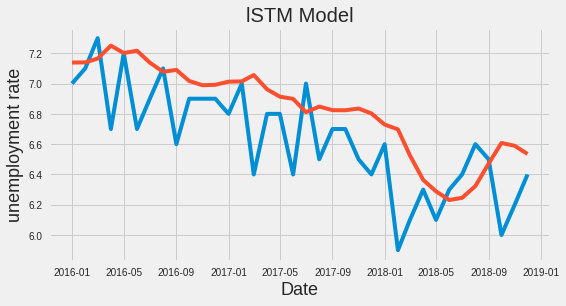

In [79]:
plt.figure(figsize=(8,4))
plt.title("lSTM Model")
plt.xlabel("Date",fontsize=18)
plt.ylabel("unemployment rate",fontsize=18)
plt.plot(valid[['values','pred1']])
plt.legend()
plt.show()

Rmse for LSTM



In [80]:
from sklearn.metrics import mean_squared_error
error3=mean_squared_error(test,pred1)
print("MSE:",error3)

print("RMSE:",np.sqrt(error3))

MSE: 0.10232527943590204
RMSE: 0.31988322781274736


In [81]:
from sklearn.metrics import mean_squared_error
error2=mean_squared_error(test,pred_bayes)
print("MSE:",error2)

print("RMSE:",np.sqrt(error2))

MSE: 0.09139133274610517
RMSE: 0.302309994452888


#Hybridization

In [82]:
NEW_PREDICTION= (pred1.T+pred_bayes.values)/2

In [83]:
NEW_PREDICTION= np.array(NEW_PREDICTION)

In [84]:
NEW_PREDICTION

array([[7.10763163, 7.04077645, 7.08488926, 7.21600515, 6.95437133,
        7.13441513, 6.91270982, 6.93794435, 7.03640464, 6.80504462,
        6.88641855, 6.90248763, 6.91499473, 6.8746456 , 6.97279593,
        6.68677122, 6.79274758, 6.80579469, 6.59730535, 6.84166505,
        6.65561053, 6.71194566, 6.72638125, 6.62793881, 6.53668827,
        6.596169  , 6.2294347 , 6.18871502, 6.24078291, 6.14224651,
        6.22227391, 6.31410034, 6.48002357, 6.52049828, 6.29794096,
        6.3217129 ]])

In [85]:
pred_bayes.values

array([7.07643165, 6.94177047, 7.00463265, 7.18151343, 6.70715307,
       7.05210157, 6.68722364, 6.79823244, 6.9825278 , 6.59290928,
       6.78370803, 6.81309104, 6.81761602, 6.73471287, 6.88914578,
       6.41132845, 6.67214458, 6.71231027, 6.38409578, 6.83515075,
       6.48661322, 6.60013844, 6.61762132, 6.45311368, 6.34417951,
       6.49460364, 5.93256896, 6.01321562, 6.19283521, 6.05329662,
       6.19900768, 6.30504718, 6.48857727, 6.4332409 , 6.0067191 ,
       6.10823474])

In [86]:
test.shape

(36,)

In [87]:
NEW_PREDICTION.shape

(1, 36)

In [88]:
pred1.shape

(36, 1)

In [89]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test,NEW_PREDICTION.T)
print("MSE:",error)

print("RMSE:",np.sqrt(error))

MSE: 0.07456705605880853
RMSE: 0.27306969084614374
